<a href="https://colab.research.google.com/github/Kagankakao/My-AI-Journey/blob/main/Computer%20Vision%20and%20PyTorch%20Fundamentals/08_pytorch_paper_replicating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf data
!rm -rf going_modular
!rm -rf sample_data
!rm -rf helper_functions.py

In [2]:
import torch
import torchvision

In [3]:
try:
    from torchinfo import summary
except:
    !pip install -q torchinfo

try:
    from going_modular.going_modular import data_setup, engine
except:
    !git clone https://github.com/Kagankakao/My-AI-Journey
    !mv "My-AI-Journey/Computer Vision and PyTorch Fundamentals/going_modular" .
    !mv "My-AI-Journey/Computer Vision and PyTorch Fundamentals/helper_functions.py" .
    !rm -rf My-AI-Journey
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
    print("young jeez")

Cloning into 'My-AI-Journey'...
remote: Enumerating objects: 516, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 516 (delta 62), reused 117 (delta 32), pack-reused 313 (from 1)
Receiving objects: 100% (516/516), 90.13 MiB | 26.54 MiB/s, done.
Resolving deltas: 100% (62/62), done.
young jeez


In [4]:
image_path = download_data("https://github.com/Kagankakao/My-AI-Journey/raw/main/data/pizza-steak-sushi.zip",
                           destination="pizza-steak-sushi")
image_path

[INFO] Did not find data/pizza-steak-sushi directory, creating one...
[INFO] Downloading pizza-steak-sushi.zip from https://github.com/Kagankakao/My-AI-Journey/raw/main/data/pizza-steak-sushi.zip...
[INFO] Unzipping pizza-steak-sushi.zip data...


PosixPath('data/pizza-steak-sushi')

In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [6]:
from torchvision import transforms

IMAGE_SIZE = 224

manual_transform = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                       transforms.ToTensor()])

In [7]:
from going_modular.going_modular import data_setup

BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir,
    test_dir,
    manual_transform,
    BATCH_SIZE)

In [8]:
image_batch, label_batch = next(iter(train_dataloader))

image, label = image_batch[0], label_batch[0]

image, label

(tensor([[[0.9255, 0.9608, 0.9961,  ..., 0.3922, 0.3922, 0.3882],
          [0.9333, 0.9529, 0.9882,  ..., 0.3882, 0.3922, 0.3843],
          [0.8980, 0.9137, 0.9490,  ..., 0.3961, 0.3882, 0.3843],
          ...,
          [0.6275, 0.6353, 0.6588,  ..., 0.6431, 0.6235, 0.5882],
          [0.6196, 0.6353, 0.6549,  ..., 0.6353, 0.6314, 0.6039],
          [0.6157, 0.6431, 0.6706,  ..., 0.6392, 0.6314, 0.6157]],
 
         [[0.9059, 0.9255, 0.9765,  ..., 0.2118, 0.2118, 0.2078],
          [0.9294, 0.9294, 0.9569,  ..., 0.2078, 0.2118, 0.2039],
          [0.9216, 0.9020, 0.9059,  ..., 0.2157, 0.2078, 0.2039],
          ...,
          [0.5412, 0.5490, 0.5765,  ..., 0.4392, 0.4157, 0.3725],
          [0.5216, 0.5451, 0.5725,  ..., 0.4471, 0.4314, 0.4000],
          [0.5098, 0.5451, 0.5804,  ..., 0.4510, 0.4353, 0.4157]],
 
         [[0.9725, 0.9686, 0.9804,  ..., 0.2627, 0.2627, 0.2588],
          [0.9922, 0.9765, 0.9843,  ..., 0.2588, 0.2627, 0.2549],
          [0.9765, 0.9647, 0.9725,  ...,

(-0.5, 223.5, 223.5, -0.5)

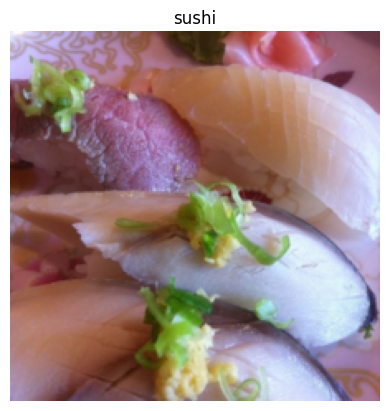

In [9]:
import matplotlib.pyplot as plt

plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)